<a href="https://colab.research.google.com/github/kcanayhan/ARI5001Principles/blob/main/BFS_DFS_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

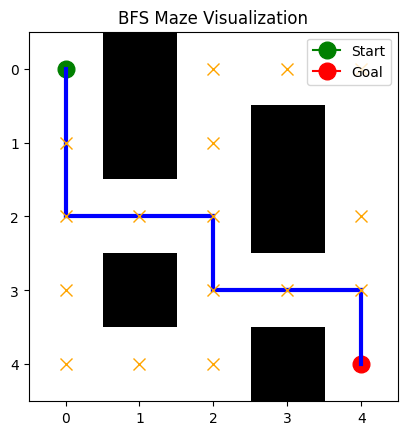

Result: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Maze representation
# 0 = free space, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
])

start = (0, 0)  # Starting point (row, column)
goal = (4, 4)   # Goal point (row, column)

def is_valid_move(maze, position):
    """Check if the move is valid."""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_successors(position):
    """Get valid successors of the current position."""
    x, y = position
    successors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        new_position = (x + dx, y + dy)
        if is_valid_move(maze, new_position):
            successors.append(new_position)
    return successors

def breadth_first_search(maze, start, goal):
    """Perform Breadth-First Search and visualize it."""
    queue = deque([(start, [start])])  # Queue to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            return path, explored  # Return the found path and explored nodes

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                queue.append((neighbor, path + [neighbor]))

    return "failure", explored  # Return failure if no path is found

# Perform BFS
result, explored_nodes = breadth_first_search(maze, start, goal)

# Visualization
fig, ax = plt.subplots()
ax.imshow(maze, cmap='Greys', origin='upper')

# Highlight the starting point
ax.plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
# Highlight the goal point
ax.plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by BFS
if isinstance(result, list):
    path_edges = list(zip(result, result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        ax.plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes
for node in explored_nodes:
    if node != start and node != goal:
        ax.plot(node[1], node[0], marker='x', color='orange', markersize=8)

ax.legend()
plt.title("BFS Maze Visualization")
plt.show()

# Output the result
print("Result:", result)

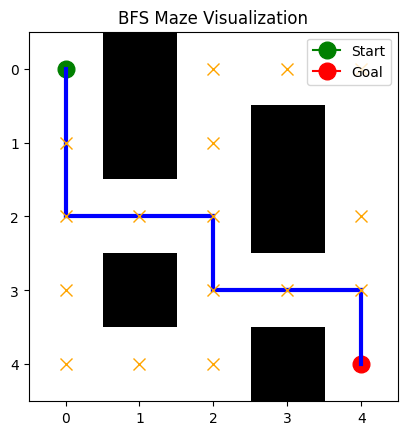

Result: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Explored Nodes Count: 18
Elapsed Time (seconds): 8.654594421386719e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
import sys

# Maze representation
# 0 = free space, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
])

start = (0, 0)  # Starting point (row, column)
goal = (4, 4)   # Goal point (row, column)

def is_valid_move(maze, position):
    """Check if the move is valid."""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_successors(position):
    """Get valid successors of the current position."""
    x, y = position
    successors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        new_position = (x + dx, y + dy)
        if is_valid_move(maze, new_position):
            successors.append(new_position)
    return successors

def breadth_first_search(maze, start, goal):
    """Perform Breadth-First Search and visualize it."""
    queue = deque([(start, [start])])  # Queue to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing

    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            return path, explored, len(explored), end_time - start_time  # Return the found path, explored nodes, count, and time

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                queue.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    return "failure", explored, len(explored), end_time - start_time  # Return failure if no path is found

# Perform BFS
result, explored_nodes, explored_count, elapsed_time = breadth_first_search(maze, start, goal)

# Visualization
fig, ax = plt.subplots()
ax.imshow(maze, cmap='Greys', origin='upper')

# Highlight the starting point
ax.plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
# Highlight the goal point
ax.plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by BFS
if isinstance(result, list):
    path_edges = list(zip(result, result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        ax.plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes
for node in explored_nodes:
    if node != start and node != goal:
        ax.plot(node[1], node[0], marker='x', color='orange', markersize=8)

ax.legend()
plt.title("BFS Maze Visualization")
plt.show()

# Output the result
print("Result:", result)
print("Explored Nodes Count:", explored_count)
print("Elapsed Time (seconds):", elapsed_time)

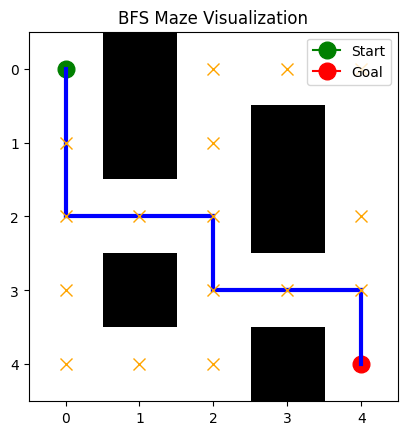

Result: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Explored Nodes Count: 18
Elapsed Time (seconds): 9.512901306152344e-05
Memory Usage (bytes): 704


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
import sys

# Maze representation
# 0 = free space, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
])

start = (0, 0)  # Starting point (row, column)
goal = (4, 4)   # Goal point (row, column)

def is_valid_move(maze, position):
    """Check if the move is valid."""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_successors(position):
    """Get valid successors of the current position."""
    x, y = position
    successors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        new_position = (x + dx, y + dy)
        if is_valid_move(maze, new_position):
            successors.append(new_position)
    return successors

def breadth_first_search(maze, start, goal):
    """Perform Breadth-First Search and visualize it."""
    queue = deque([(start, [start])])  # Queue to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)

    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                queue.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

# Perform BFS
result, explored_nodes, explored_count, elapsed_time, memory_usage = breadth_first_search(maze, start, goal)

# Visualization
fig, ax = plt.subplots()
ax.imshow(maze, cmap='Greys', origin='upper')

# Highlight the starting point
ax.plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
# Highlight the goal point
ax.plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by BFS
if isinstance(result, list):
    path_edges = list(zip(result, result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        ax.plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes
for node in explored_nodes:
    if node != start and node != goal:
        ax.plot(node[1], node[0], marker='x', color='orange', markersize=8)

ax.legend()
plt.title("BFS Maze Visualization")
plt.show()

# Output the result
print("Result:", result)
print("Explored Nodes Count:", explored_count)
print("Elapsed Time (seconds):", elapsed_time)
print("Memory Usage (bytes):", memory_usage)

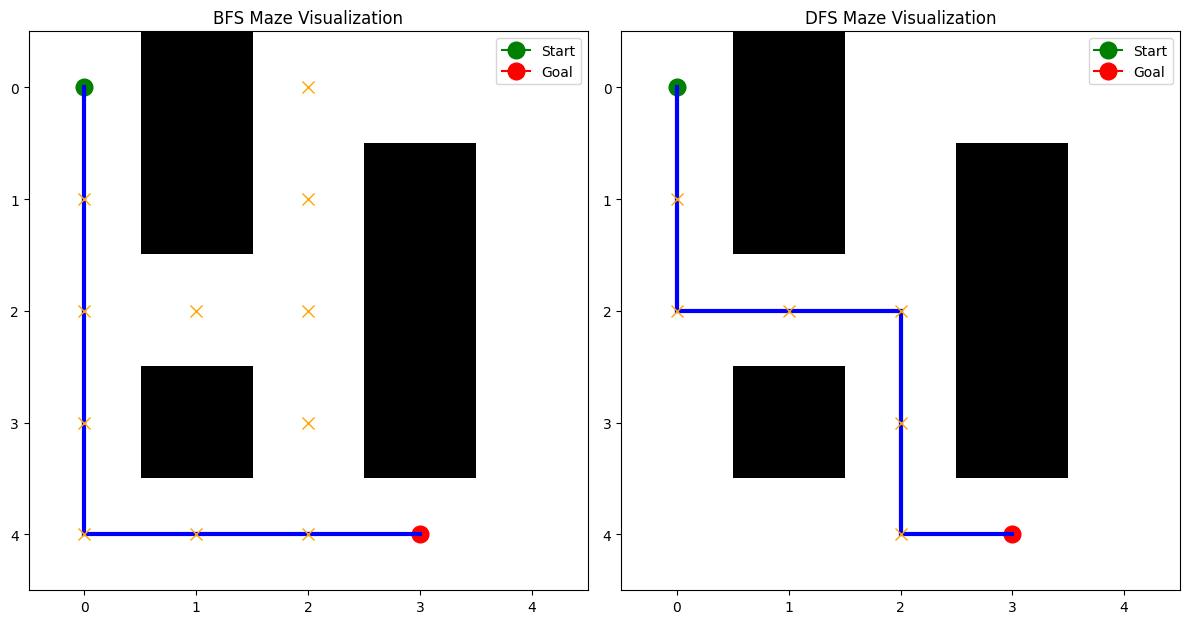

BFS Result: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
BFS Explored Nodes Count: 13
BFS Elapsed Time (seconds): 0.00011181831359863281
BFS Memory Usage (bytes): 640
DFS Result: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3)]
DFS Explored Nodes Count: 8
DFS Elapsed Time (seconds): 5.245208740234375e-05
DFS Memory Usage (bytes): 600


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
import sys

# Maze representation
# 0 = free space, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
])

start = (0, 0)  # Starting point (row, column)
goal = (4, 3)   # Goal point (row, column)

def is_valid_move(maze, position):
    """Check if the move is valid."""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_successors(position):
    """Get valid successors of the current position."""
    x, y = position
    successors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        new_position = (x + dx, y + dy)
        if is_valid_move(maze, new_position):
            successors.append(new_position)
    return successors

def breadth_first_search(maze, start, goal):
    """Perform Breadth-First Search and visualize it."""
    queue = deque([(start, [start])])  # Queue to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)

    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                queue.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

def depth_first_search(maze, start, goal):
    """Perform Depth-First Search and visualize it."""
    stack = [(start, [start])]  # Stack to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)

    while stack:
        current, path = stack.pop()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                stack.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

# Perform BFS
bfs_result, bfs_explored_nodes, bfs_explored_count, bfs_elapsed_time, bfs_memory_usage = breadth_first_search(maze, start, goal)

# Perform DFS
dfs_result, dfs_explored_nodes, dfs_explored_count, dfs_elapsed_time, dfs_memory_usage = depth_first_search(maze, start, goal)

# Visualization for BFS
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# BFS Visualization
axs[0].imshow(maze, cmap='Greys', origin='upper')
axs[0].plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
axs[0].plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by BFS
if isinstance(bfs_result, list):
    path_edges = list(zip(bfs_result, bfs_result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        axs[0].plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes for BFS
for node in bfs_explored_nodes:
    if node != start and node != goal:
        axs[0].plot(node[1], node[0], marker='x', color='orange', markersize=8)

axs[0].legend()
axs[0].set_title("BFS Maze Visualization")

# Visualization for DFS
axs[1].imshow(maze, cmap='Greys', origin='upper')
axs[1].plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
axs[1].plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by DFS
if isinstance(dfs_result, list):
    path_edges = list(zip(dfs_result, dfs_result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        axs[1].plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes for DFS
for node in dfs_explored_nodes:
    if node != start and node != goal:
        axs[1].plot(node[1], node[0], marker='x', color='orange', markersize=8)

axs[1].legend()
axs[1].set_title("DFS Maze Visualization")

plt.tight_layout()
plt.show()

# Output the results
print("BFS Result:", bfs_result)
print("BFS Explored Nodes Count:", bfs_explored_count)
print("BFS Elapsed Time (seconds):", bfs_elapsed_time)
print("BFS Memory Usage (bytes):", bfs_memory_usage)

print("DFS Result:", dfs_result)
print("DFS Explored Nodes Count:", dfs_explored_count)
print("DFS Elapsed Time (seconds):", dfs_elapsed_time)
print("DFS Memory Usage (bytes):", dfs_memory_usage)

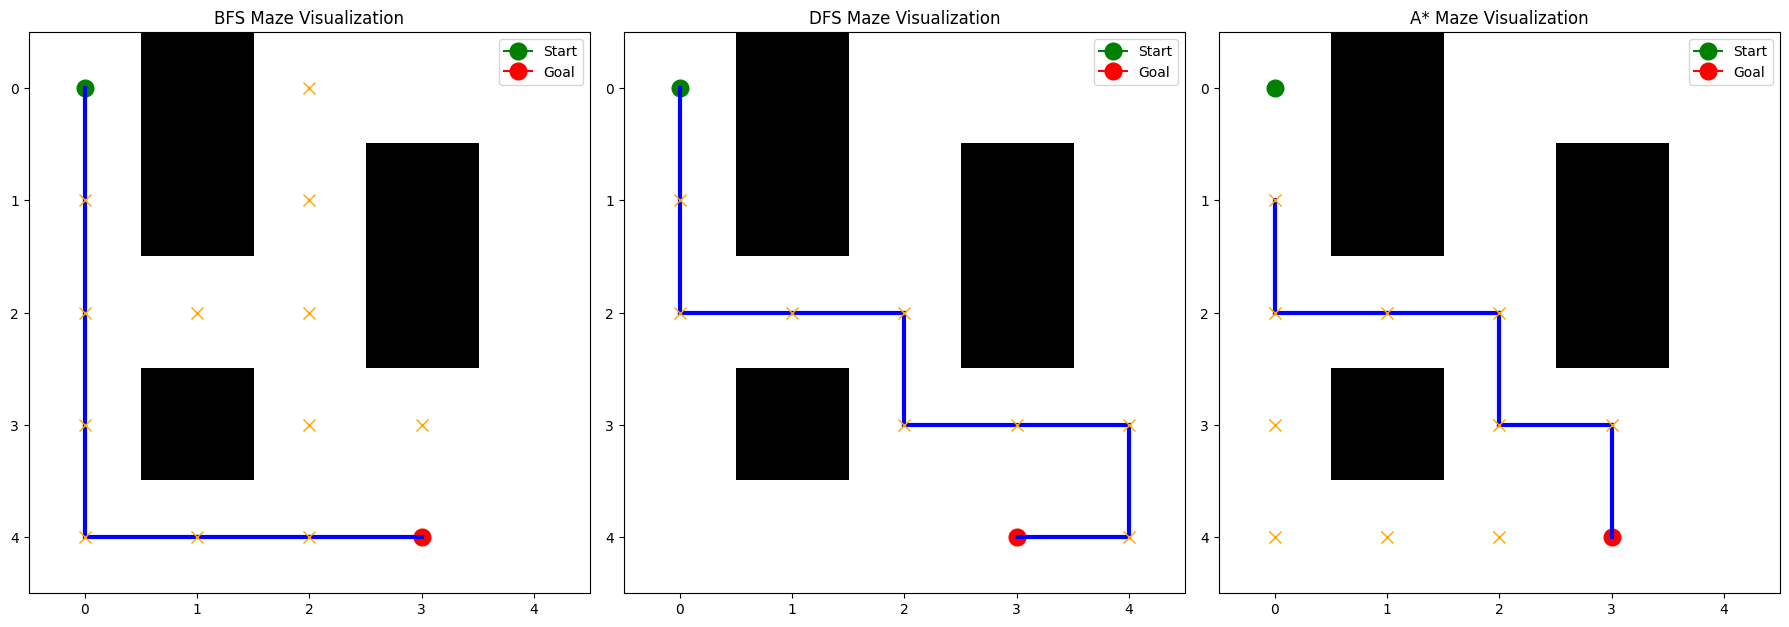

BFS Result: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
BFS Explored Nodes Count: 14
BFS Elapsed Time (seconds): 0.000598907470703125
BFS Memory Usage (bytes): 640
DFS Result: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 3)]
DFS Explored Nodes Count: 10
DFS Elapsed Time (seconds): 6.985664367675781e-05
DFS Memory Usage (bytes): 696
A* Result: [(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3)]
A* Explored Nodes Count: 12
A* Elapsed Time (seconds): 0.00017118453979492188
A* Memory Usage (bytes): 1424


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
import sys
import heapq

# Maze representation
# 0 = free space, 1 = wall
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
])

start = (0, 0)  # Starting point (row, column)
goal = (4, 3)   # Goal point (row, column)

def is_valid_move(maze, position):
    """Check if the move is valid."""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_successors(position):
    """Get valid successors of the current position."""
    x, y = position
    successors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        new_position = (x + dx, y + dy)
        if is_valid_move(maze, new_position):
            successors.append(new_position)
    return successors

def heuristic(a, b):
    """Calculate the Manhattan distance heuristic."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def breadth_first_search(maze, start, goal):
    """Perform Breadth-First Search and visualize it."""
    queue = deque([(start, [start])])  # Queue to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)

    while queue:
        current, path = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                queue.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(queue) + sys.getsizeof(visited) + sys.getsizeof(explored)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

def depth_first_search(maze, start, goal):
    """Perform Depth-First Search and visualize it."""
    stack = [(start, [start])]  # Stack to hold (current position, path)
    visited = set()  # Set to track visited positions
    explored = []    # List to track the order of explored nodes

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)

    while stack:
        current, path = stack.pop()
        if current in visited:
            continue

        visited.add(current)
        explored.append(current)

        if current == goal:
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            if neighbor not in visited:  # Avoid cycles
                stack.append((neighbor, path + [neighbor]))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(stack) + sys.getsizeof(visited) + sys.getsizeof(explored)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

def a_star_search(maze, start, goal):
    """Perform A* Search using a heuristic function."""
    open_set = []
    heapq.heappush(open_set, (0, start))  # (cost, position)
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    visited = set()
    explored = []

    start_time = time.time()  # Start timing
    initial_memory = sys.getsizeof(open_set) + sys.getsizeof(came_from) + sys.getsizeof(g_score) + sys.getsizeof(f_score)

    while open_set:
        current = heapq.heappop(open_set)[1]
        visited.add(current)
        explored.append(current)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            end_time = time.time()  # End timing
            final_memory = sys.getsizeof(open_set) + sys.getsizeof(came_from) + sys.getsizeof(g_score) + sys.getsizeof(f_score)
            memory_used = final_memory - initial_memory  # Calculate memory usage
            return path, explored, len(explored), end_time - start_time, memory_used  # Return the found path, explored nodes, count, time, and memory

        for neighbor in get_successors(current):
            tentative_g_score = g_score[current] + 1  # Assume cost to neighbor is 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    end_time = time.time()  # End timing
    final_memory = sys.getsizeof(open_set) + sys.getsizeof(came_from) + sys.getsizeof(g_score) + sys.getsizeof(f_score)
    memory_used = final_memory - initial_memory  # Calculate memory usage
    return "failure", explored, len(explored), end_time - start_time, memory_used  # Return failure if no path is found

# Perform BFS
bfs_result, bfs_explored_nodes, bfs_explored_count, bfs_elapsed_time, bfs_memory_usage = breadth_first_search(maze, start, goal)

# Perform DFS
dfs_result, dfs_explored_nodes, dfs_explored_count, dfs_elapsed_time, dfs_memory_usage = depth_first_search(maze, start, goal)

# Perform A* Search
a_star_result, a_star_explored_nodes, a_star_explored_count, a_star_elapsed_time, a_star_memory_usage = a_star_search(maze, start, goal)

# Visualization for BFS
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# BFS Visualization
axs[0].imshow(maze, cmap='Greys', origin='upper')
axs[0].plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
axs[0].plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by BFS
if isinstance(bfs_result, list):
    path_edges = list(zip(bfs_result, bfs_result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        axs[0].plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes for BFS
for node in bfs_explored_nodes:
    if node != start and node != goal:
        axs[0].plot(node[1], node[0], marker='x', color='orange', markersize=8)

axs[0].legend()
axs[0].set_title("BFS Maze Visualization")

# Visualization for DFS
axs[1].imshow(maze, cmap='Greys', origin='upper')
axs[1].plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
axs[1].plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by DFS
if isinstance(dfs_result, list):
    path_edges = list(zip(dfs_result, dfs_result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        axs[1].plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes for DFS
for node in dfs_explored_nodes:
    if node != start and node != goal:
        axs[1].plot(node[1], node[0], marker='x', color='orange', markersize=8)

axs[1].legend()
axs[1].set_title("DFS Maze Visualization")

# Visualization for A*
axs[2].imshow(maze, cmap='Greys', origin='upper')
axs[2].plot(start[1], start[0], marker='o', color='green', markersize=12, label='Start')
axs[2].plot(goal[1], goal[0], marker='o', color='red', markersize=12, label='Goal')

# Highlight the path found by A*
if isinstance(a_star_result, list):
    path_edges = list(zip(a_star_result, a_star_result[1:]))
    for (x1, y1), (x2, y2) in path_edges:
        axs[2].plot([y1, y2], [x1, x2], color='blue', linewidth=3)

# Highlight explored nodes for A*
for node in a_star_explored_nodes:
    if node != start and node != goal:
        axs[2].plot(node[1], node[0], marker='x', color='orange', markersize=8)

axs[2].legend()
axs[2].set_title("A* Maze Visualization")

plt.tight_layout()
plt.show()

# Output the results
print("BFS Result:", bfs_result)
print("BFS Explored Nodes Count:", bfs_explored_count)
print("BFS Elapsed Time (seconds):", bfs_elapsed_time)
print("BFS Memory Usage (bytes):", bfs_memory_usage)

print("DFS Result:", dfs_result)
print("DFS Explored Nodes Count:", dfs_explored_count)
print("DFS Elapsed Time (seconds):", dfs_elapsed_time)
print("DFS Memory Usage (bytes):", dfs_memory_usage)

print("A* Result:", a_star_result)
print("A* Explored Nodes Count:", a_star_explored_count)
print("A* Elapsed Time (seconds):", a_star_elapsed_time)
print("A* Memory Usage (bytes):", a_star_memory_usage)